In [1]:
%matplotlib inline
from matplotlib import style
style1 = style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
# Query All Records in the the Database
first_row = session.query(Measurement).first()
first_row.__dict__

# # Use the session to query Dow table and display the first 5 trade volumes
# for row in session.query(Measurement.date, Measurement.prcp).limit(15).all():
#     print(row)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x248011ad748>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [28]:
# first_row = session.query(Station).first()
# first_row.__dict__

# # Use the session to query Dow table and display the first 5 trade volumes
# for row in session.query(Station.name).limit(15).all():
#     print(row)

In [13]:
#test area Measurement
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [15]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()
#Measurement  Station

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [16]:
# Earliest Date - ('2010-01-01') - last date ('2017-08-23')
session.query(Measurement.date).order_by(Measurement.date).first()
# lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# print(lastDate)

('2010-01-01')

In [15]:
# Query for the Measurement closing price for `CSCO` 1 week before `2011-04-08` using the datetime library
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365) #dt.timedelta(month=12)
# print("Query Date: ", query_date)

# Exploratory Climate Analysis

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12mos = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= query_date).all()
# print(last_12mos)

# Calculate the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365) #dt.timedelta(month=12)
#print("Query Date from 1 year ago: ", query_date)
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
date_prcp_df = pd.DataFrame(last_12mos[:], columns=['date', 'prcp'])
date_prcp_df.groupby('date').all()
# date_prcp_df.sort_values("date", inplace=True)
# date_prcp_df.set_index('date', inplace=True)
#date_prcp_df.head(10)
date_prcp_clean_df = date_prcp_df.fillna(0)
#sum_date() = date_prcp_clean_df.sort_values("date").groupby('date').sum()
#print(sum_date)
#print(len(sum_date))
date_prcp_df.set_index('date', inplace=True)
date_prcp_clean_df.head(10)
#date_prcp_clean_df.info()

#date_prcp_df.describe()  ##good info
#type(date_prcp_clean_df.prcp)
#print(date_prcp_clean_df.prcp).sum()
#print(f"Total Precep ", prcp.sum())
#prcpday = date_prcp_clean_df.groupby(['date','prcp'],as_index=False).agg(lambda x : x.sum() if x.dtype=='float64' else ' '.join(x))
#prcpday.describe()


,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
5,2016-08-28,0.01
6,2016-08-29,0.00
7,2016-08-30,0.00
8,2016-08-31,0.13
9,2016-09-01,0.00


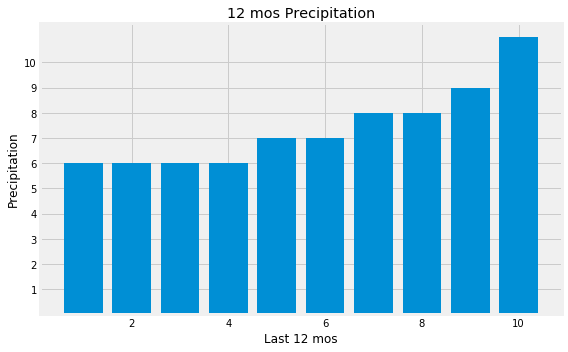

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
results = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.prcp.desc()).all()
prcp_date = [result[0] for result in results[:10]]
prcp1 = [int(result[1]) for result in results[:10]]

fig, ax = plt.subplots(figsize=(8,5))
ypos = range(1, len(prcp_date)+1)
ax.bar(ypos, prcp1[::-1])   #prcp1[::-1]
ax.set_xlabel("Last 12 mos")
ax.set_ylabel("Precipitation")
ax.set_yticks(ypos)
#ax.set_yticklabels(emoji_id[::-1])
ax.set_title("12 mos Precipitation")
fig.tight_layout()
plt.show()
# # plt.title("12 mos Precipitation")
# # plt.xlabel("Last 12 mos")
# # plt.ylabel("Precipitation")
plt.show()

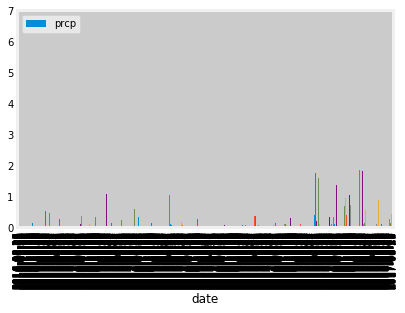

In [26]:
date_prcp_clean_df.plot(x='date', y='prcp', style='style1', kind = 'bar')#, style

![precipitation](Images/precipitation.png)

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

![describe](Images/describe.png)

In [82]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id, Station.station).distinct(Station.station).all()
stat_count = session.query(Station.id, Station.station).distinct(Station.station).count()
print(stat_count)

9


In [32]:
# What are the most active stations? (i.e. what stations have the most rows)?
stat_active = session.query(Station.station).distinct(Station.station)
# print(stat_active)
stat_active
# stat_active = session.query(Station.station)
# for item in stat_active:
# #     print(f"id: {Station.station}")
#     print(f"item: {Station.item.count()}")
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
